In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Lx = 1.0        # Length of the x domain
Ly = 1.0        # Length of the y domain
T = 0.01        # Total time
Mx = 100        # Number of spatial points in the x direction
My = 100        # Number of spatial points in the y direction
N = 500         # Number of time steps
delta_1 = 0.1   # Diffusion coefficient for u
delta_2 = 0.05  # Diffusion coefficient for v

# Derived parameters
dx = Lx / Mx    # Spatial step size in the x direction
dy = Ly / My    # Spatial step size in the y direction
dt = T / N      # Time step size

# Reaction terms
def f(u, v):
    # Example reaction term for u (you can modify this)
    return 1.0 - u - u*v

def g(u, v):
    # Example reaction term for v (you can modify this)
    return u - v

# Grid
x = np.linspace(0, Lx, Mx)
y = np.linspace(0, Ly, My)
u = np.zeros((N, Mx, My))  # Solution grid for u
v = np.zeros((N, Mx, My))  # Solution grid for v

### Explicit finite difference method (double for loop)

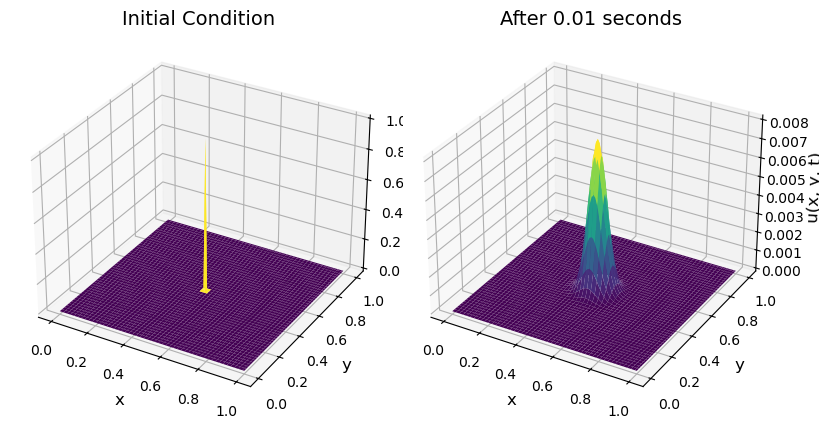

In [4]:
# Initial condition: delta function at the center
u[0, Mx // 2, My // 2] = 1

for n in range(0, N-1):
    for i in range(1, Mx-1):
        for j in range(1, My-1):
            u[n+1, i, j] = u[n, i, j] + alpha * (
                u[n, i+1, j] + u[n, i-1, j] + u[n, i, j+1] + u[n, i, j-1] - 4*u[n, i, j]
            )

# Boundary conditions: zero at the boundaries
u[:, 0, :] = 0
u[:, Mx-1, :] = 0
u[:, :, 0] = 0
u[:, :, My-1] = 0

# Plot the initial and final solutions (surface plot)
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(8, 6))

# Initial condition
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, u[0], cmap='viridis')
ax.set_title("Initial Condition", fontsize=14)
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_zlabel("u(x, y, t)", fontsize=12)

# Final condition
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, u[-1], cmap='viridis')
ax.set_title(f"After {T:.2f} seconds", fontsize=14)
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_zlabel("u(x, y, t)", fontsize=12)

plt.tight_layout()
plt.show()